# UI - Case 2 for Yelp User Modeling 
# - Expand more similar users from seed users

<br> Before started this visualization, you shall have generated data by following this ReadMe file
<br> ReadMe file: https://github.com/hycinthgeo/YelpUserModeling by running python main.py
<br> Since nearest neighbor is an expensive computation with slower compute than cosine similarity, I randomly genearted 
<li> a subset of the raw user table, and </li>
<li> a subset of the transformed "allData" table, and </li>

<br> Please feel free to generate more test data, by enabling the following cell, and changing num_rand_members. 

In [1]:
# random generate subset of users
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('src/python')
import random_generator as rg
num_rand_members = 1000
#rg.generate_random_case2_inputs(num_rand_members)

io_config = pd.read_json("configs/data-pipeline.json", typ='Series')
output_user_list = io_config["output path for user list-case2"]

# raw user data with randomly selected records
user_path_subset = io_config["data path for user table-case2"]
raw = pd.read_csv(user_path_subset)

# transformed data of features
input_path_raw_data_subset = io_config["all transformed data-case2"]
alldata = pd.read_csv(input_path_raw_data_subset)

## Load recommended user_list prepared during main.py

In [2]:
out_df = pd.read_csv(output_user_list)
num_exact_match = len(out_df[out_df["user_source"] == "exact_match"])
out_df.loc[num_exact_match-2:num_exact_match+8]

,user_idx,dist_from_exact_match,user_source
64,995,0.000000,exact_match
65,997,0.000000,exact_match
66,583,1.414214,expanded-6
67,228,2.000000,expanded-29
68,355,2.000000,expanded-29
69,269,2.000000,expanded-44
70,919,2.236068,expanded-44
71,120,2.236068,expanded-44
72,273,2.645751,expanded-58
73,657,3.162278,expanded-58


## Detailed example picked from the first expanded audience with close distance to the exact match

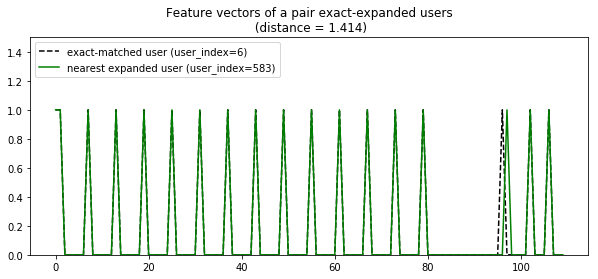

In [3]:
# example
seed_id = 6
fig_setup = 110
fig = plt.figure(figsize = (10, 4))
fig.add_subplot(fig_setup+1)
plt.plot(alldata.loc[seed_id].values, '--k')
list_exp_user_idx = out_df[out_df['user_source'] == 'expanded-'+str(seed_id)]['user_idx'].values
list_exp_distance = out_df[out_df['user_source'] == 'expanded-'+str(seed_id)]['dist_from_exact_match'].values

for i, idx in enumerate(list_exp_user_idx):
    if idx != seed_id:
        plt.plot(alldata.loc[idx].values, '-g')
        plt.title("Feature vectors of a pair exact-expanded users\n (distance = %4.3f)"%\
                  (list_exp_distance[i]))
plt.legend(['exact-matched user (user_index=%d)'%seed_id, "nearest expanded user (user_index=%d)"%idx], \
          loc="upper left")
plt.ylim([0, 1.5])
fig.subplots_adjust(hspace = 0.5)
plt.show()

In [4]:
pd.set_option('display.max_colwidth', -1)
print("raw info from User Table for user_idx = %d"%seed_id)
raw.loc[seed_id]

raw info from User Table for user_idx = 6


average_stars    5                                                                             
compliments      {}                                                                            
elite            []                                                                            
fans             1                                                                             
friends          ['xX5Y2-Tp_4SuZea85DoINQ', 'Ky1BXFCOkUpWcIep3Im09w', 'LMGEfmk2Sn6ONgzcsj24cA']
name             Jim                                                                           
review_count     1                                                                             
type             user                                                                          
user_id          E6wju5MjKQEH22h7j7p7zg                                                        
votes            {'funny': 0, 'useful': 0, 'cool': 0}                                          
yelping_since    2012-12                

In [5]:
pd.set_option('display.max_colwidth', -1)
print("raw info from User Table for the nearest expanded user %d from user_idx = %d"%\
      (list_exp_user_idx[0], seed_id))

raw.loc[list_exp_user_idx[0]] 

raw info from User Table for the nearest expanded user 583 from user_idx = 6


average_stars    4.75                                                                          
compliments      {}                                                                            
elite            []                                                                            
fans             1                                                                             
friends          ['faUI7ljrmCAaBZfnE9Jefg', 'IQw7tFdFG9KRH7HlwrMyww', 'XywdfdjVPYLVtKpW0DGs6Q']
name             herve                                                                         
review_count     4                                                                             
type             user                                                                          
user_id          68lgvHzlLAJAuoxz6ByQug                                                        
votes            {'funny': 0, 'useful': 0, 'cool': 0}                                          
yelping_since    2009-03                

## Summary
<br> As demostrated in this case, besides the "yelping_since", other attributes are aligned, thus marked a quality expansion